In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [3]:
# old:
#url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = (pd.read_csv(url)
      .rename(columns={"Country/Region": "country", "Province/State": "province_or_state"})
      .drop(["Lat", "Long"], axis=1)
     )
print(df.shape)
df.head(15)

(245, 66)


,province_or_state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,3,3,3
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,56,68,79,97,128,158,266,301,387,387
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,52,78,84,115,136,160,194,235,249,265
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,2,2,3,4,6,9,19,32,39,39
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,171,210,267,307,353,436,669,669,818,1029


# Countries

In [4]:
def get_top_n_countries(_df, nn, transpose=True):
    agg_dict = {col: "sum" for col in df.columns if col not in {"province_or_state", "country"}}
    dfg = df.groupby("country").agg(agg_dict)
    dfg = dfg.sort_values(df.columns[-1], ascending=False)
    top_n = dfg.head(nn)
    if transpose:
        dft = top_n.T.reset_index().rename(columns={"index": "date"}).set_index("date")
        dft.index = pd.to_datetime(dft.index)
        result = dft
    else:
        result = top_n
    return result

In [5]:
df15 = get_top_n_countries(df, 15)
df15

country,China,Italy,US,Spain,Germany,Iran,France,Switzerland,United Kingdom,"Korea, South",Netherlands,Austria,Belgium,Canada,Norway
date,,,,,,,,,,,,,,,
2020-01-22,548,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-23,643,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-24,920,0,2,0,0,0,2,0,0,2,0,0,0,0,0
2020-01-25,1406,0,2,0,0,0,3,0,0,2,0,0,0,0,0
2020-01-26,2075,0,5,0,0,0,3,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-21,81305,53578,25489,25374,22213,20610,14463,6575,5067,8799,3640,2814,2815,1277,2118
2020-03-22,81435,59138,33276,28768,24873,21638,16243,7474,5745,8961,4217,3582,3401,1469,2385
2020-03-23,81498,63927,43847,35136,29056,23049,20123,8795,6726,8961,4764,4474,3743,2088,2621


In [6]:
sns.set_palette("PuBuGn_d")

 0 China                 81661
 1 Italy                 74386
 2 US                    65778
 3 Spain                 49515
 4 Germany               37323
 5 Iran                  27017
 6 France                25600
 7 Switzerland           10897
 8 United Kingdom         9640
 9 Korea, South           9137


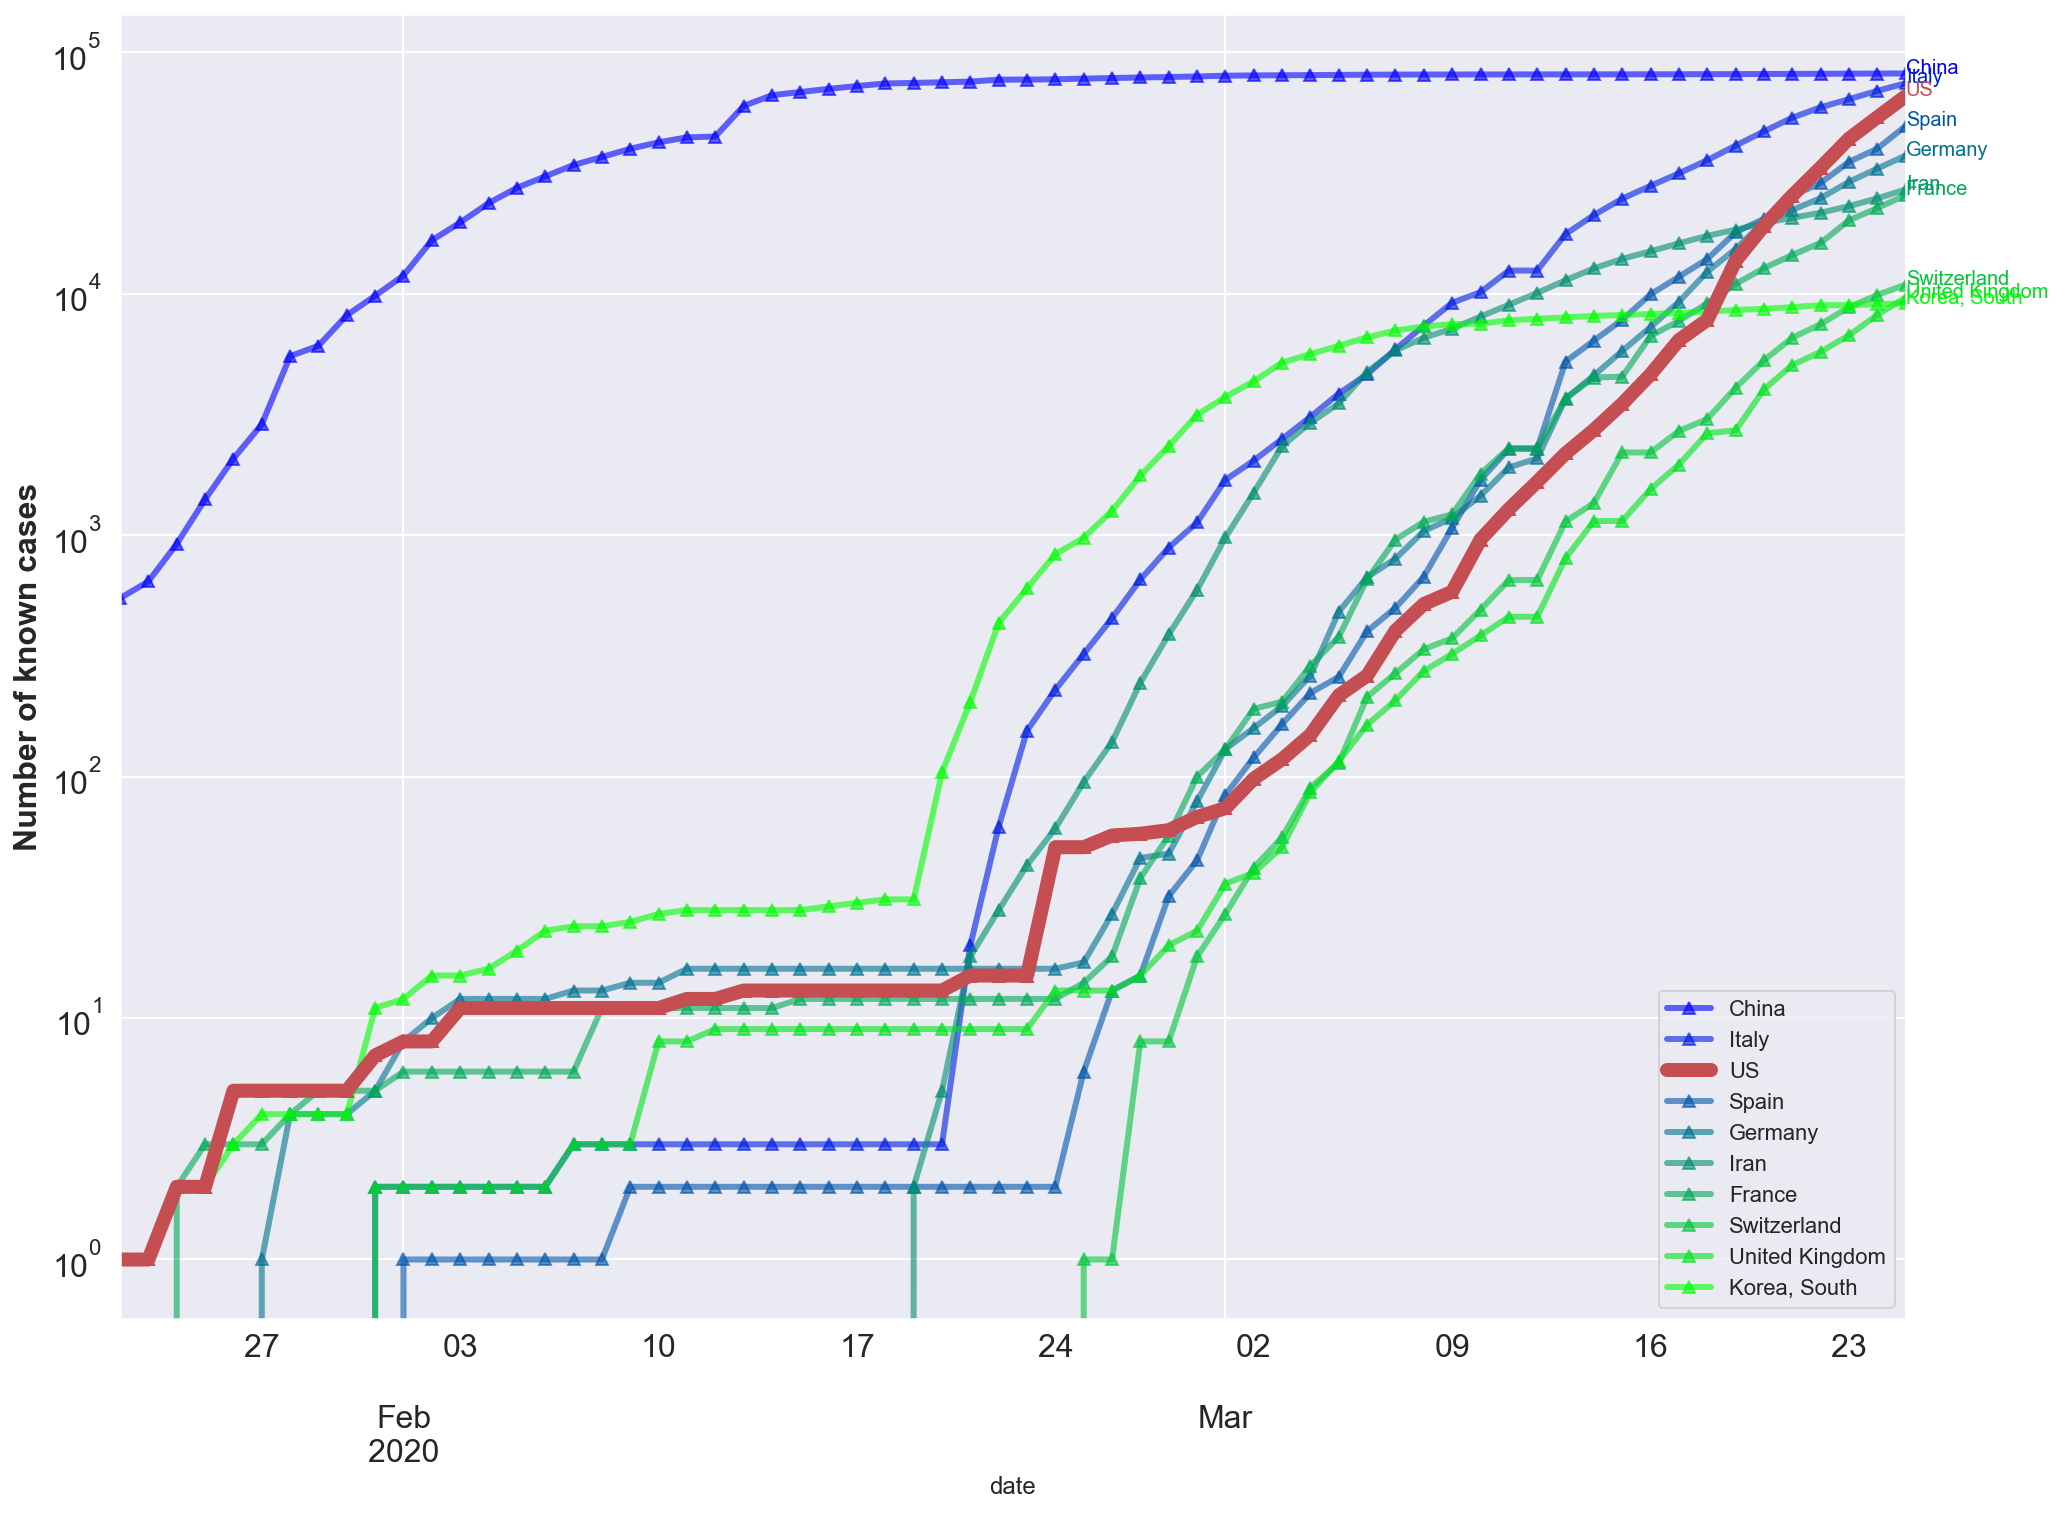

In [14]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_palette("PuBuGn_d")
top10_countries = get_top_n_countries(df, 10)
greens = np.linspace(0, 1, top10_countries.shape[1])
blues = np.linspace(1, 0, len(greens))
reds = np.zeros_like(greens)
alpha_orig = alpha = 0.6
alphas = np.zeros_like(greens) + alpha
colors = np.array([reds, greens, blues, alphas]).T
linewidth_orig = linewidth = 3
zorder_orig = zorder = 1
for ii, country in enumerate(top10_countries):
    print(f'{ii:2d} {country:20s} {top10_countries[country].iloc[-1]:6d}')
    color = colors[ii].reshape(-1,4)
    if country == "US":
        color = 'r'
        alpha = 1
        linewidth = 7
        zorder = 2
    top10_countries[country].plot(
        ax=ax, color=color, logy=True,
        linewidth=linewidth, alpha=alpha, marker='^',
        fontsize=16, zorder=zorder
    )
    if not isinstance(color, str):
        color = color[0][:3]
    plt.text(top10_countries[country].index[-1], top10_countries[country].iloc[-1], country,
             color=color, fontsize=10)
    linewidth = linewidth_orig
    alpha = alpha_orig
    zorder = zorder_orig
plt.ylabel("Number of known cases", fontsize=16, fontweight='bold')
plt.legend();

# States

In [41]:
fmt = '%m-%d-%Y'
today_str = datetime.datetime.now().strftime(fmt)
yesterday_str = (datetime.datetime.now() - datetime.timedelta(1)).strftime(fmt)
today_str, yesterday_str

('03-25-2020', '03-24-2020')

In [46]:
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/03-25-2020.csv
url_base = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'
today_url = url_base.format(today_str)
yesterday_url = url_base.format(yesterday_str)
states_today_raw = pd.read_csv(today_url)
states_yesterday_raw = pd.read_csv(yesterday_url)

In [47]:
def get_by_state(_df):
    return (_df
            .groupby('Province_State')
            .agg({'Confirmed': 'sum', 'Deaths': 'sum'})
            .reset_index()
            .rename(columns={'Province_State': 'state', 'Confirmed': 'confirmed', 'Deaths': 'deaths'})
           )

In [48]:
states_today = get_by_state(states_today_raw)
print(states_today.shape)
states_today.head()

(130, 3)


,state,confirmed,deaths
0,Alabama,381,1
1,Alaska,41,1
2,Alberta,358,2
3,American Samoa,0,0
4,Anhui,990,6


In [49]:
states_yesterday = get_by_state(states_yesterday_raw)
print(states_yesterday.shape)
states_yesterday.head()

(131, 3)


,state,confirmed,deaths
0,Alabama,242,0
1,Alaska,34,0
2,Alberta,359,1
3,American Samoa,0,0
4,Anhui,990,6


In [51]:
trump_states = [
    'Alaska',
    'Idaho',
    'Montana',
    'North Dakota',
    'Wisconsin',
    'Michigan',
    'Wyoming',
    'South Dakota',
    'Iowa',
    'Indiana',
    'Ohio',
    'Pennsylvania',
    'Utah',
    'Nebraska',
    'Missouri',
    'Kentucky',
    'West Virginia',
    'Arizona',
    'Kansas',
    'Arkansas',
    'Tennessee',
    'North Carolina',
    'South Carolina',
    'Oklahoma',
    'Louisiana',
    'Mississippi',
    'Alabama',
    'Georgia',
    'Texas',
    'Florida'
]
clinton_states = [
    'Vermont',
    'New Hampshire',
    'Washington',
    'Minnesota',
    'Illinois',
    'New York',
    'Massachusetts',
    'Rhode Island',
    'Oregon',
    'Nevada',
    'New Jersey',
    'Connecticut',
    'California',
    'Colorado',
    'Virginia',
    'Maryland',
    'Delaware',
    'New Mexico',
    'District of Columbia',
    'Hawaii'
]

In [52]:
len(trump_states), len(clinton_states)

(30, 20)

In [53]:
pres_states = pd.DataFrame({'winner': ['trump']*30 + ['clinton']*20, 'state': trump_states+clinton_states})
pres_states.head()

,winner,state
0,trump,Alaska
1,trump,Idaho
2,trump,Montana
3,trump,North Dakota
4,trump,Wisconsin


In [58]:
states_today_pres = states_today.merge(pres_states)
states_yesterday_pres = states_yesterday.merge(pres_states)

In [70]:
merged = (states_yesterday_pres
          .merge(states_today_pres, on=['state', 'winner'], suffixes=['_yesterday', '_today'])
          .set_index('state')
         )
merged['ratio'] = merged['confirmed_today'] / merged['confirmed_yesterday']
merged.head()

,confirmed_yesterday,deaths_yesterday,winner,confirmed_today,deaths_today,ratio
state,,,,,,
Alabama,242,0,trump,381,1,1.574380
Alaska,34,0,trump,41,1,1.205882
Arizona,326,5,trump,401,6,1.230061
Arkansas,219,2,trump,280,2,1.278539
California,2538,50,clinton,2998,65,1.181245


In [72]:
merged.loc['New York']

confirmed_yesterday      25681
deaths_yesterday           210
winner                 clinton
confirmed_today          30841
deaths_today               285
ratio                  1.20093
Name: New York, dtype: object

In [71]:
by_winner = merged.groupby('winner').agg(
    {
        'confirmed_yesterday': 'sum',
        'confirmed_today': 'sum',
        'ratio': 'mean'
    }
)
by_winner['real_ratio'] = by_winner['confirmed_today'] / by_winner['confirmed_yesterday']
by_winner

,confirmed_yesterday,confirmed_today,ratio,real_ratio
winner,,,,
clinton,40405,49002,1.223753,1.212771
trump,13048,16452,1.289756,1.260883


# the below used to work but now is broken

In [19]:
def get_top_n_states(_df, nn, transpose=True):
    states = _df[_df['country'] == "US"].copy()
    states = (
        states
        .sort_values(states.columns[-1], ascending=False)
        .drop('country', axis=1)
        .rename(columns={'province_or_state': 'state'})
        .set_index('state')
    )
    top_n = states.head(nn)
    if transpose:
        result = (
            top_n
            .T
            .reset_index()
            .rename(columns={"index": "date"})
            .set_index("date")
        )
        result.index = pd.to_datetime(result.index)
    else:
        result = top_n
    return result

In [20]:
get_top_n_states(df, 10)

state,NaN
date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2020-03-21,25489
2020-03-22,33276
2020-03-23,43847


In [27]:
[xx for xx in df[df['province_or_state'].notnull()]['province_or_state']]

['Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Islands',
 '

ValueError: Unknown format code 's' for object of type 'float'

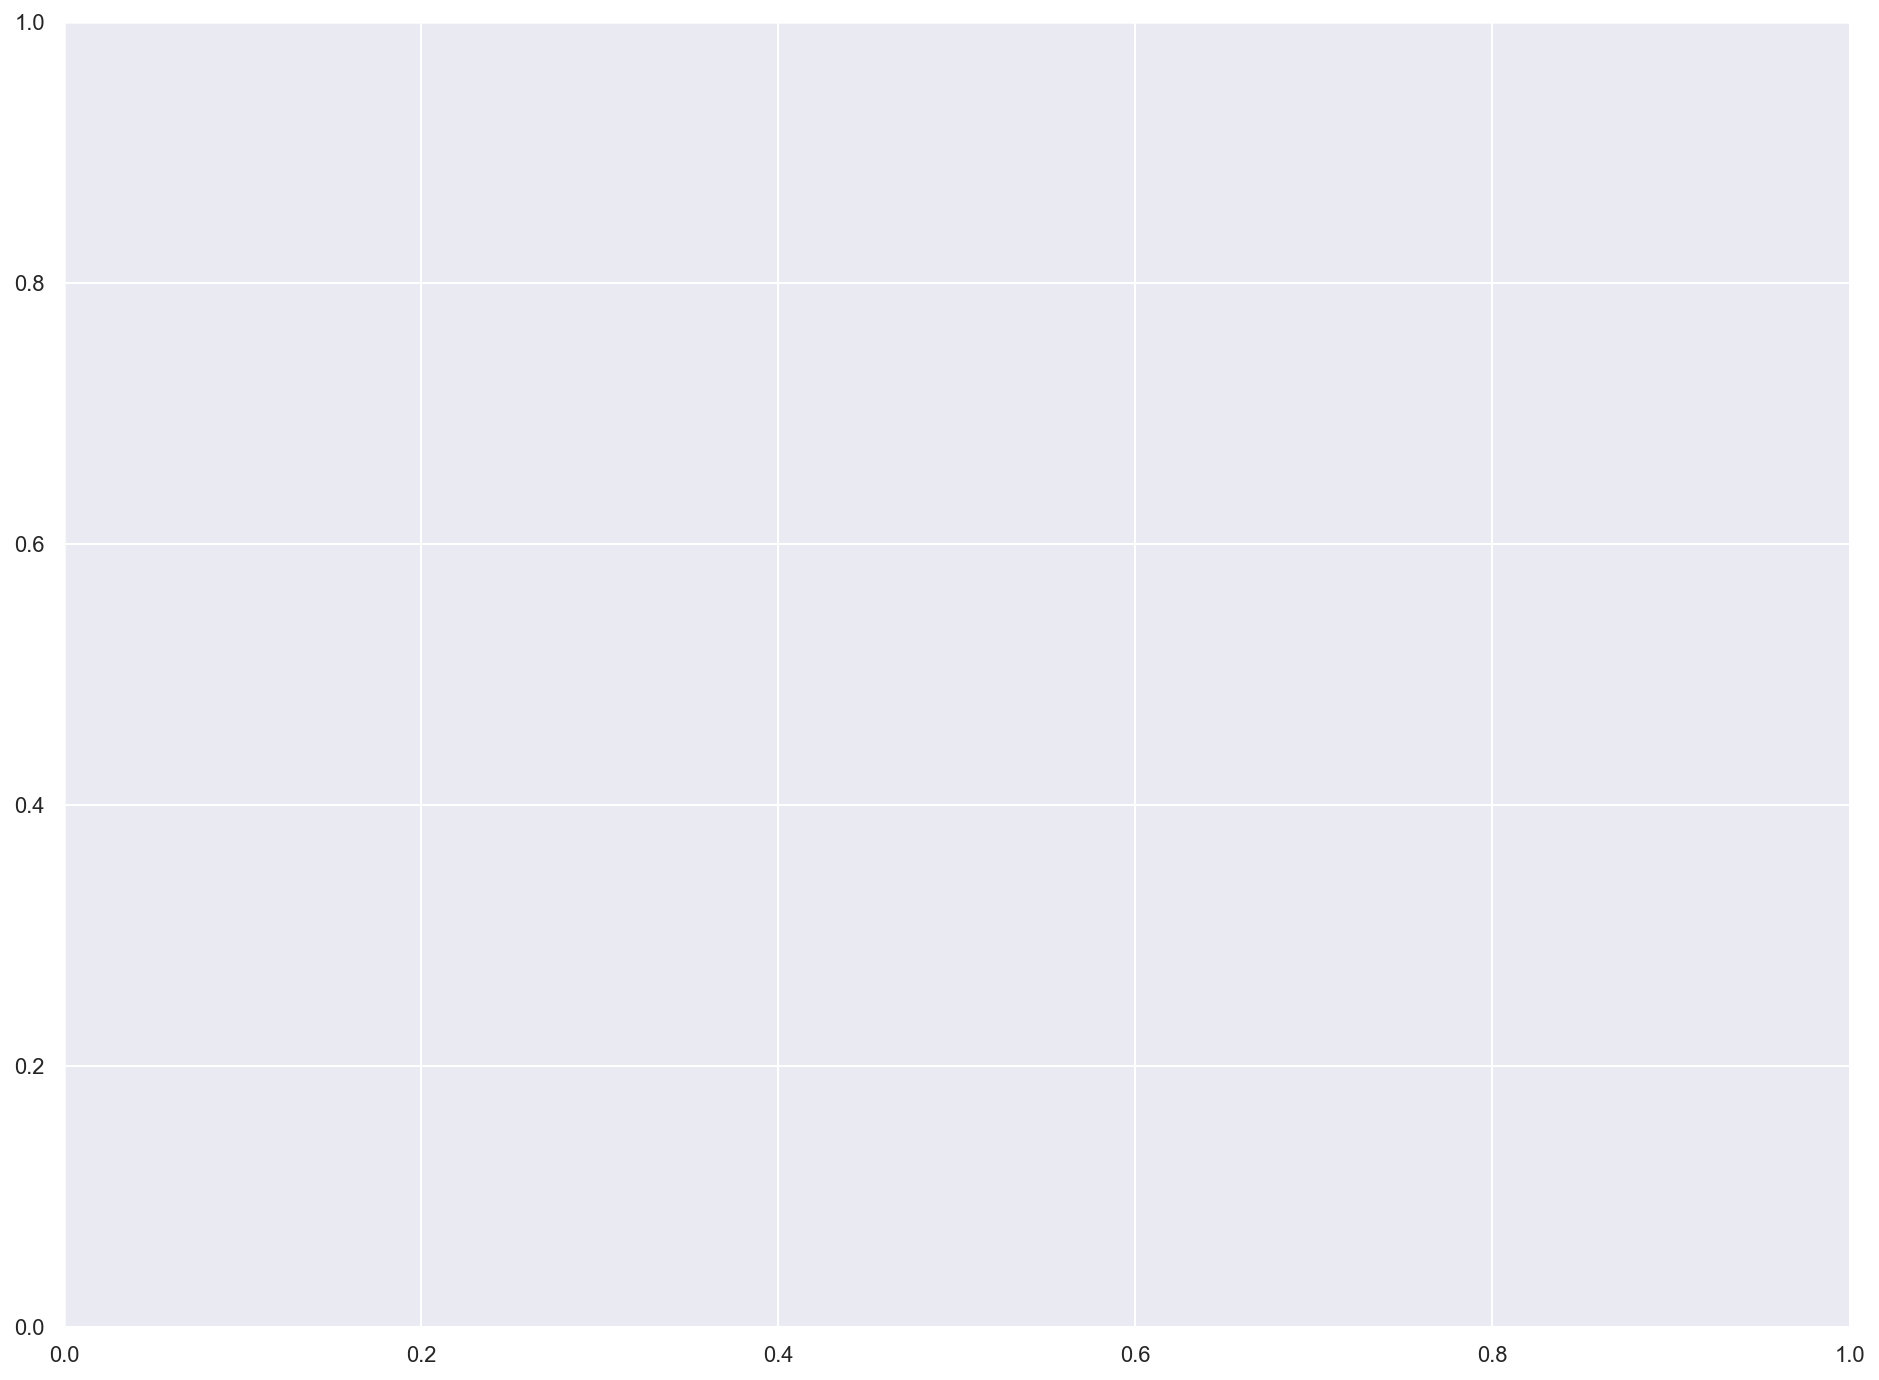

In [17]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_palette("PuBuGn_d")
top10_states = get_top_n_states(df, 10)
greens = np.linspace(0, 1, top10_states.shape[1])
blues = np.linspace(1, 0, len(greens))
reds = np.zeros_like(greens)
alpha_orig = alpha = 0.6
alphas = np.zeros_like(greens) + alpha
colors = np.array([reds, greens, blues, alphas]).T
linewidth_orig = linewidth = 3
zorder_orig = zorder = 1
for ii, state in enumerate(top10_states):
    print(f'{ii:2d} {state:20s} {top10_states[state].iloc[-1]:6d}')
    color = colors[ii].reshape(-1,4)
    if state == "Massachusetts":
        color = 'r'
        alpha = 1
        linewidth = 7
        zorder = 2
    top10_states[state].plot(
        ax=ax, color=color, logy=True,
        linewidth=linewidth, alpha=alpha, marker='^',
        fontsize=16, zorder=zorder
    )
    if not isinstance(color, str):
        color = color[0][:3]
    plt.text(top10_states[state].index[-1], top10_states[state].iloc[-1], state,
             color=color, fontsize=10)
    linewidth = linewidth_orig
    alpha = alpha_orig
    zorder = zorder_orig
plt.ylabel("Number of known cases", fontsize=16, fontweight='bold')
xlim = plt.xlim()
plt.xlim(datetime.datetime(2020, 3, 11), xlim[1])
plt.legend(loc='lower right');

In [18]:
state

nan